In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MeanShift:
    def __init__(self, bandwidth=None, bandwidth_norm_step=100):
        self.bandwidth = bandwidth
        self.bandwidth_norm_step = bandwidth_norm_step

    def fit(self, data):

        if self.bandwidth == None:
            # Compute bandwidth as a function of data
            self.bandwidth = np.linalg.norm(data.max() - data.min()) / self.bandwidth_norm_step

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]

                for featureset in data:
                    if np.linalg.norm(featureset - centroid) < self.bandwidth:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break

            if optimized:
                break

        self.centroids = centroids

        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []

        for featureset in data:
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            classification = (distances.index(min(distances)))

            self.classifications[classification].append(featureset)

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

X = data[['sepal-length', 'sepal-width']].values

In [5]:
ms = MeanShift()
ms.fit(X)

centroids = ms.centroids

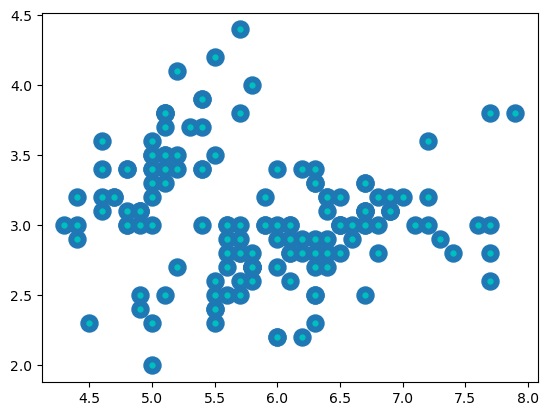

In [16]:
plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='c', marker='.', s=50)

plt.show()